In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_mat = sio.loadmat("/content/gdrive/My Drive/dataset/SVHN/format2/train_32x32.mat")
test_mat = sio.loadmat("/content/gdrive/My Drive/dataset/SVHN/format2/test_32x32.mat")

X_train = np.transpose(train_mat["X"], (3,0,1,2))
y_train = train_mat["y"]
X_test = np.transpose(test_mat["X"], (3,0,1,2))
y_test = test_mat["y"]

print("Train dataset shapes:")
print(X_train.shape)
print(y_train.shape)
print("Test dataset shapes:")
print(X_test.shape)
print(y_test.shape)

Train dataset shapes:
(73257, 32, 32, 3)
(73257, 1)
Test dataset shapes:
(26032, 32, 32, 3)
(26032, 1)


In [ ]:
for i, element in enumerate(y_train):
  if element[0] == 10:
    y_train[i] = [0]
for i, element in enumerate(y_test):
  if element[0] == 10:
    y_test[i] = [0]

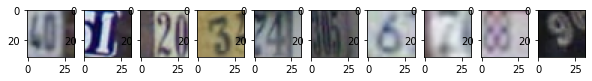

In [ ]:
plt.figure(figsize=(10,1))
plot_count = 1
for i in range(10):
  indexes = np.where(y_train==i)[0]
  random_indexes = np.random.randint(len(indexes), size=1)
  for random_index in random_indexes:
    plt.subplot(1,10,plot_count)
    plt.imshow(X_train[indexes[random_index]])
    plot_count+=1

In [ ]:
from tensorflow import keras
from keras import Input, models, layers, utils

In [ ]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
cnn = models.Sequential()
cnn.add(Input(shape=(32, 32, 3)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Dropout(0.2))
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(10, activation="softmax"))


cnn.summary() 

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_395 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_305 (MaxPooli  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_353 (Ba  (None, 16, 16, 32)       128       
 tchNormalization)                                               
                                                                 
 dropout_158 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 conv2d_396 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_354 (Ba  (None, 14, 14, 64)     

In [ ]:
cnn.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
cnn_history = cnn.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
573/573 [==============================] - 57s 10ms/step - loss: 0.9785 - accuracy: 0.6985 - val_loss: 0.3993 - val_accuracy: 0.8811
Epoch 2/15
573/573 [==============================] - 5s 10ms/step - loss: 0.4257 - accuracy: 0.8712 - val_loss: 0.3192 - val_accuracy: 0.9074
Epoch 3/15
573/573 [==============================] - 6s 11ms/step - loss: 0.3470 - accuracy: 0.8969 - val_loss: 0.2732 - val_accuracy: 0.9202
Epoch 4/15
573/573 [==============================] - 6s 11ms/step - loss: 0.3046 - accuracy: 0.9096 - val_loss: 0.2936 - val_accuracy: 0.9138
Epoch 5/15
573/573 [==============================] - 6s 10ms/step - loss: 0.2755 - accuracy: 0.9192 - val_loss: 0.2584 - val_accuracy: 0.9252
Epoch 6/15
573/573 [==============================] - 6s 10ms/step - loss: 0.2582 - accuracy: 0.9237 - val_loss: 0.2385 - val_accuracy: 0.9322
Epoch 7/15
573/573 [==============================] - 6s 10ms/step - loss: 0.2388 - accuracy: 0.9294 - val_loss: 0.2261 - val_accuracy: 0.936

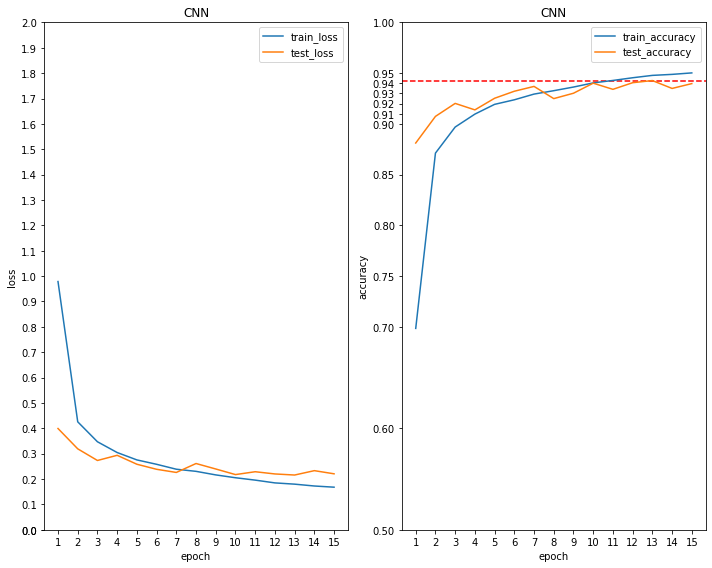

In [ ]:
x_index = np.arange(1,16)

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(x_index, cnn_history.history["loss"], label="train_loss")
plt.plot(x_index, cnn_history.history["val_loss"], label="test_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,0])
plt.title("CNN")
plt.legend()

plt.subplot(1,2,2)
plt.axhline(y = max(cnn_history.history["val_accuracy"]), color = 'r', linestyle = 'dashed')
plt.plot(x_index, cnn_history.history["accuracy"], label="train_accuracy")
plt.plot(x_index, cnn_history.history["val_accuracy"], label="test_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.yticks([0.5,0.6,0.7,0.75,0.8,0.85,0.9,0.91,0.92,0.93,0.94,0.95,1])
plt.title("CNN")
plt.legend()

plt.tight_layout()